In [2]:
# !pip install openpyxl
import pandas as pd
import numpy as np


In [3]:
sheets = pd.read_excel('ghgp_data_2023.xlsx', sheet_name=None)

direct_point_emitters = sheets["Direct Point Emitters"]
direct_point_emitters.head()

,Summary data collected by the Greenhouse Gas Reporting Program for 2023,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,This data was reported to EPA by facilities as...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,All emissions data is presented in units of me...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Facility Id,FRS Id,Facility Name,City,State,Zip Code,Address,County,Latitude,Longitude,...,Titanium Dioxide Production,Underground Coal Mines,Zinc Production,Municipal Landfills,Industrial Wastewater Treatment,Manufacture of Electric Transmission and Distr...,Industrial Waste Landfills,Is some CO2 collected on-site and used to manu...,Is some CO2 reported as emissions from the aff...,Does the facility employ continuous emissions ...
3,1013701,110070931003,30-30 Gas Plant,Plains,TX,79355,2300 FM 1622,YOAKUM COUNTY,33.05188,-102.88792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N
4,1012037,110063753656,50 Buttes Gas Plant,Gillette,WY,82716,3669 South Hwy 50,CAMPBELL COUNTY,43.85274,-105.77781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N


In [4]:
direct_point_emitters = sheets["Direct Point Emitters"]
direct_point_emitters.columns = direct_point_emitters.iloc[2]
direct_point_emitters = direct_point_emitters.iloc[2+1:].reset_index(drop=True)
direct_point_emitters.head()

2,Facility Id,FRS Id,Facility Name,City,State,Zip Code,Address,County,Latitude,Longitude,...,Titanium Dioxide Production,Underground Coal Mines,Zinc Production,Municipal Landfills,Industrial Wastewater Treatment,Manufacture of Electric Transmission and Distribution Equipment,Industrial Waste Landfills,Is some CO2 collected on-site and used to manufacture other products and therefore not emitted from the affected manufacturing process unit(s)? (as reported under Subpart G or S),"Is some CO2 reported as emissions from the affected manufacturing process unit(s) under Subpart AA, G or P collected and transferred off-site or injected (as reported under Subpart PP)?",Does the facility employ continuous emissions monitoring?
0,1013701,110070931003,30-30 Gas Plant,Plains,TX,79355,2300 FM 1622,YOAKUM COUNTY,33.05188,-102.88792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N
1,1012037,110063753656,50 Buttes Gas Plant,Gillette,WY,82716,3669 South Hwy 50,CAMPBELL COUNTY,43.85274,-105.77781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N
2,1010475,NaN,AJAX PLANT,Wheeler,TX,79014,16600 CR N,NaN,35.546399,-100.116256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N
3,1003129,110062227139,AKER PLANT,STREETMAN,TX,75859,261 FCR 181,FREESTONE COUNTY,31.91,-96.2233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N
4,1005887,110070597614,ALLIANCE COMPRESSOR STATION,JUSTIN,TX,76247,12495 HWY 114,DENTON COUNTY,33.03512,-97.331434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N


In [5]:
cleaned_dfs = []

for sheet_name, df in sheets.items():
    
    # --- 1. Set the header row ---
    header_row = 2                     # 4th line of the sheet
    df.columns = df.iloc[header_row]   # assign row 4 as column names
    
    # --- 2. Drop metadata rows above ---
    df = df.iloc[header_row+1:].reset_index(drop=True)
    
    # --- 3. Add the sheet name in a new column ---
    df["source_sheet"] = sheet_name
    
    # --- 4. Drop rows that are fully empty ---
    df = df.dropna(how="all")
    
    cleaned_dfs.append(df)

# --- 5. Combine all sheets ---
combined = pd.concat(cleaned_dfs, ignore_index=True)

combined.head()

2,Facility Id,FRS Id,Facility Name,City,State,Zip Code,Address,County,Latitude,Longitude,...,GHG Quantity Associated with Natural Gas Supply,GHG Quantity Associated with Natural Gas Liquids Supply,GHG Quantity Associated with CO2 Supply,Quantity of CO2 Received for Injection,Total Mass of CO2 Sequestered,NaN,NaN,D,Direct Emitter,NaN
0,1013701,110070931003,30-30 Gas Plant,Plains,TX,79355,2300 FM 1622,YOAKUM COUNTY,33.05188,-102.88792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1012037,110063753656,50 Buttes Gas Plant,Gillette,WY,82716,3669 South Hwy 50,CAMPBELL COUNTY,43.85274,-105.77781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1010475,NaN,AJAX PLANT,Wheeler,TX,79014,16600 CR N,NaN,35.546399,-100.116256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003129,110062227139,AKER PLANT,STREETMAN,TX,75859,261 FCR 181,FREESTONE COUNTY,31.91,-96.2233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1005887,110070597614,ALLIANCE COMPRESSOR STATION,JUSTIN,TX,76247,12495 HWY 114,DENTON COUNTY,33.03512,-97.331434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
combined.columns.tolist()

['Facility Id',
 'FRS Id',
 'Facility Name',
 'City',
 'State',
 'Zip Code',
 'Address',
 'County',
 'Latitude',
 'Longitude',
 'Primary NAICS Code',
 'Industry Type (subparts)',
 'Industry Type (sectors)',
 'Total reported direct emissions',
 'CO2 emissions (non-biogenic) ',
 'Methane (CH4) emissions ',
 'Nitrous Oxide (N2O) emissions ',
 'HFC emissions',
 'PFC emissions',
 'SF6 emissions ',
 'NF3 emissions',
 'Other Fully Fluorinated GHG emissions',
 'HFE emissions',
 'Very Short-lived Compounds emissions',
 'Other GHGs (metric tons CO2e)',
 'Biogenic CO2 emissions (metric tons)',
 'Stationary Combustion',
 'Electricity Generation',
 'Adipic Acid Production',
 'Aluminum Production',
 'Ammonia Manufacturing',
 'Cement Production',
 'Electronics Manufacture',
 'Ferroalloy Production',
 'Fluorinated GHG Production',
 'Glass Production',
 'HCFC–22 Production from HFC–23 Destruction',
 'Hydrogen Production',
 'Iron and Steel Production',
 'Lead Production',
 'Lime Production',
 'Magnesium

In [7]:
combined = combined.loc[:, combined.columns.notna()]
combined.dtypes

2
Facility Id                                 object
FRS Id                                      object
Facility Name                               object
City                                        object
State                                       object
                                             ...  
GHG Quantity Associated with CO2 Supply     object
Quantity of CO2 Received for Injection      object
Total Mass of CO2 Sequestered               object
D                                           object
Direct Emitter                              object
Length: 92, dtype: object

In [8]:
cols_to_drop = [
    "City",
    "State",
    "Zip Code",
    "Address",
    "County",
    "Latitude",
    "Longitude"
]

combined = combined.drop(columns=cols_to_drop, errors="ignore")
len(combined.columns.tolist())

85

In [9]:
for col in ["Facility Id", "FRS Id"]:
    combined[col] = (
        combined[col]
        .astype(str)
        .str.replace(",", "", regex=False)
        .astype(float)   # convert scientific notation or strings to float first
        .astype("Int64") # pandas nullable integer type (allows NaN)
    )

In [10]:
emission_cols = [col for col in combined.columns if "emissions" in col.lower()]
id_cols = ['Facility Id','FRS Id','Facility Name']
emissions = combined[id_cols + emission_cols]

emissions.dtypes

2
Facility Id                                                                                                                                                                                   Int64
FRS Id                                                                                                                                                                                        Int64
Facility Name                                                                                                                                                                                object
Total reported direct emissions                                                                                                                                                              object
CO2 emissions (non-biogenic)                                                                                                                                                                 object
Methane (CH4) emis

In [11]:
emissions.columns

Index(['Facility Id', 'FRS Id', 'Facility Name',
       'Total reported direct emissions', 'CO2 emissions (non-biogenic) ',
       'Methane (CH4) emissions ', 'Nitrous Oxide (N2O) emissions ',
       'HFC emissions', 'PFC emissions', 'SF6 emissions ', 'NF3 emissions',
       'Other Fully Fluorinated GHG emissions', 'HFE emissions',
       'Very Short-lived Compounds emissions',
       'Biogenic CO2 emissions (metric tons)',
       'Is some CO2 reported as emissions from the affected manufacturing process unit(s) under Subpart AA, G or P collected and transferred off-site or injected (as reported under Subpart PP)?',
       'Does the facility employ continuous emissions monitoring? ',
       'Total reported emissions from Onshore Oil & Gas Production ',
       'Total reported emissions from Gathering & Boosting',
       'State where Emissions Occur',
       'Total reported direct  emissions from Transmission Pipelines',
       'Total reported direct emissions from Local Distribution Com

In [12]:
non_nums = ['State where Emissions Occur','Is some CO2 reported as emissions from the affected manufacturing process unit(s) under Subpart AA, G or P collected and transferred off-site or injected (as reported under Subpart PP)?','Does the facility employ continuous emissions monitoring? ']

In [13]:
emissions = emissions.drop(columns=non_nums)

In [14]:
emissions.rename(columns={"FRS Id": "Frs Id"}, inplace=True)

In [16]:
total_reported_cols = [
    col for col in emissions.columns 
    if "total reported" in col.lower()
]
# total_emissions[total_reported_cols] = (
#     total_emissions[total_reported_cols]
#     .replace(",", "", regex=True)   # remove commas inside numbers
#     .apply(pd.to_numeric, errors="coerce")  # convert; non-numeric → NaN
# )

In [17]:
parent_companies = pd.read_csv("ghgp_data_parent_company.csv")

id_cols = ["GHGRP FACILITY ID", "FRS ID (FACILITY)"]

for col in id_cols:
    parent_companies[col] = (
        parent_companies[col]
        .astype(str)                      # force everything to string
        .str.replace(",", "", regex=False) # remove commas if any
        .str.strip()                       # remove spaces
        .replace("", pd.NA)                # empty → NaN
        .astype(float)                     # convert sci-notation or numeric strings
        .astype("Int64")                   # final nullable integer type
    )
parent_companies = parent_companies.rename(columns={"GHGRP FACILITY ID": "Facility Id", "FRS ID (FACILITY)": "FRS Id"})
parent_companies.head()

,Facility Id,FRS Id,REPORTING YEAR,FACILITY NAME,FACILITY ADDRESS,FACILITY CITY,FACILITY STATE,FACILITY ZIP,FACILITY COUNTY,PARENT COMPANY NAME,PARENT CO. STREET ADDRESS,PARENT CO. CITY,PARENT CO. STATE,PARENT CO. ZIP,PARENT CO. PERCENT OWNERSHIP,FACILITY NAICS CODE
0,1000001,110000490166,2023,PSE Ferndale Generating Station,5105 LAKE TERRELL ROAD,FERNDALE,WA,98248,WHATCOM COUNTY,PUGET HOLDINGS LLC,Po Box 97034,Bellevue,WA,98009,100.0,221112.0
1,1000002,110041175000,2023,Ardagh Glass Inc. (Dunkirk),524 E. CENTER STREET,DUNKIRK,IN,47336,JAY COUNTY,ARDAGH GLASS INC,"10194 Crosspoint Blvd, Suite 410",Indianapolis,IN,46256,100.0,327213.0
2,1000003,110001482887,2023,Ardagh Glass Inc. (Henderson),620 Facet Road,Henderson,NC,27537,VANCE COUNTY,ARDAGH GLASS INC,10194 CROSSPOINT BLVD STE 410,Indianapolis,IN,46256,100.0,327213.0
3,1000005,110000482022,2023,Ardagh Glass Inc. (Madera),24441 AVENUE 12 & ROAD 24 1/2,MADERA,CA,93637,MADERA COUNTY,ARDAGH GLASS INC,10194 CROSSPOINT BLVD STE 410,Indianapolis,IN,46256,100.0,327213.0
4,1000007,110007014774,2023,AMERICAN GYPSUM - BERNALILLO (WALLBOARD) PLANT,1000 N HILL RD,BERNALILLO,NM,87004,SANDOVAL COUNTY,EAGLE MATERIALS INC,"5960 Berkshire Lane, Suite 900",Dallas,TX,75225,100.0,327420.0


In [18]:
parent_companies.columns = parent_companies.columns.str.title()
parent_companies

,Facility Id,Frs Id,Reporting Year,Facility Name,Facility Address,Facility City,Facility State,Facility Zip,Facility County,Parent Company Name,Parent Co. Street Address,Parent Co. City,Parent Co. State,Parent Co. Zip,Parent Co. Percent Ownership,Facility Naics Code
0,1000001,110000490166,2023,PSE Ferndale Generating Station,5105 LAKE TERRELL ROAD,FERNDALE,WA,98248,WHATCOM COUNTY,PUGET HOLDINGS LLC,Po Box 97034,Bellevue,WA,98009,100.0,221112.0
1,1000002,110041175000,2023,Ardagh Glass Inc. (Dunkirk),524 E. CENTER STREET,DUNKIRK,IN,47336,JAY COUNTY,ARDAGH GLASS INC,"10194 Crosspoint Blvd, Suite 410",Indianapolis,IN,46256,100.0,327213.0
2,1000003,110001482887,2023,Ardagh Glass Inc. (Henderson),620 Facet Road,Henderson,NC,27537,VANCE COUNTY,ARDAGH GLASS INC,10194 CROSSPOINT BLVD STE 410,Indianapolis,IN,46256,100.0,327213.0
3,1000005,110000482022,2023,Ardagh Glass Inc. (Madera),24441 AVENUE 12 & ROAD 24 1/2,MADERA,CA,93637,MADERA COUNTY,ARDAGH GLASS INC,10194 CROSSPOINT BLVD STE 410,Indianapolis,IN,46256,100.0,327213.0
4,1000007,110007014774,2023,AMERICAN GYPSUM - BERNALILLO (WALLBOARD) PLANT,1000 N HILL RD,BERNALILLO,NM,87004,SANDOVAL COUNTY,EAGLE MATERIALS INC,"5960 Berkshire Lane, Suite 900",Dallas,TX,75225,100.0,327420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9055,1014921,110071704308,2023,Avista Landfill,NaN,Kettle Falls,WA,99141,STEVENS COUNTY,AVISTA CORP,1411 E Mission Ave,Spokane,WA,99202,100.0,562212.0
9056,1015119,110057451831,2023,VMC Specialty Alloys LLC,800 Martin Luther King Jr Drive,Adairsville,GA,30103,BARTOW COUNTY,VMC Specialty Alloys LLC,800 Martin Luther King Drive,Adairsville,GA,30103,100.0,331314.0
9057,1015125,110028279413,2023,Blue Flint Capture Company,2841 3rd St SW,Underwood,ND,58576,MCLEAN COUNTY,Harvestone Low Carbon Partners,2841 3rd Street SW,Underwood,ND,58576,100.0,325120.0
9058,1015127,<NA>,2023,Kronospan Simsboro LLC,486 Duraflake Road,Simsboro,LA,71275,NaN,KRONOSPAN INC,1 Kronospan Way,Eastaboga,AL,36260,100.0,321219.0


In [19]:
# Make a copy
pc = parent_companies.copy()

# Strip spaces on facility names
pc["Facility Name"] = pc["Facility Name"].astype(str).str.strip()

# Drop duplicates for each key
pc_frs     = pc.dropna(subset=["Frs Id"]).drop_duplicates(subset=["Frs Id"])
pc_facid   = pc.dropna(subset=["Facility Id"]).drop_duplicates(subset=["Facility Id"])
pc_fname   = pc.dropna(subset=["Facility Name"]).drop_duplicates(subset=["Facility Name"])

# Build lookup dictionaries
frs_map   = pc_frs.set_index("Frs Id")["Parent Company Name"].to_dict()
facid_map = pc_facid.set_index("Facility Id")["Parent Company Name"].to_dict()
fname_map = pc_fname.set_index("Facility Name")["Parent Company Name"].to_dict()

# Clean emissions facility names
emissions["Facility Name"] = emissions["Facility Name"].astype(str).str.strip()

# Assign parent company in priority order
emissions["Parent Company Name"] = (
    emissions["Frs Id"].map(frs_map)                             # 1) exact match by FRS
        .fillna(emissions["Facility Id"].map(facid_map))         # 2) fallback by Facility ID
        .fillna(emissions["Facility Name"].map(fname_map))       # 3) fallback by facility name
)

# emissions = emissions.dropna(axis=0, how="all")


In [20]:
emissions = emissions.replace(["nan", "NaN", "None", ""], pd.NA)
emissions = emissions.dropna(axis=0, how="all")

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_1099/1236069349.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  emissions = emissions.replace(["nan", "NaN", "None", ""], pd.NA)


In [21]:
emissions

2,Facility Id,Frs Id,Facility Name,Total reported direct emissions,CO2 emissions (non-biogenic),Methane (CH4) emissions,Nitrous Oxide (N2O) emissions,HFC emissions,PFC emissions,SF6 emissions,...,Other Fully Fluorinated GHG emissions,HFE emissions,Very Short-lived Compounds emissions,Biogenic CO2 emissions (metric tons),Total reported emissions from Onshore Oil & Gas Production,Total reported emissions from Gathering & Boosting,Total reported direct emissions from Transmission Pipelines,Total reported direct emissions from Local Distribution Companies,Total reported direct emissions from Electrical Equipment Use,Parent Company Name
0,1013701,110070931003,30-30 Gas Plant,44170.546,43895.8,259.25,15.496,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STAKEHOLDER GAS SERVICES LLC
1,1012037,110063753656,50 Buttes Gas Plant,61389.032,58078.3,3278.25,32.482,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MERITAGE MIDSTREAM SERVICES II LLC
2,1010475,<NA>,AJAX PLANT,38738.508,38053.6,663.75,21.158,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRODUCERS MIDSTREAM II LLC
3,1003129,110062227139,AKER PLANT,39758.102,39504.3,231.75,22.052,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M6 Midstream LLC
4,1005887,110070597614,ALLIANCE COMPRESSOR STATION,48988.056,46801.0,2180.50,6.556,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRESTWOOD EQUITY PARTNERS LP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8778,1012091,110071160272,Seminole East Field (SEF),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAPTUREPOINT LLC
8779,1009861,110055518140,Seminole San Andres Unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HESS CORP
8780,1002150,110071162292,Shute Creek Facility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXXON MOBIL CORP
8781,1011767,110070082145,Wasson San Andres Field,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXXON MOBIL CORP


In [22]:
id_cols = ['Facility Id','Frs Id','Facility Name','Parent Company Name']
total_emissions = emissions[['Parent Company Name'] + total_reported_cols]

In [23]:
company_totals = (
    total_emissions
    .groupby("Parent Company Name", dropna=False)
    .sum(numeric_only=True)
    .reset_index()
)
company_totals

2,Parent Company Name,Total reported direct emissions,Total reported emissions from Onshore Oil & Gas Production,Total reported emissions from Gathering & Boosting,Total reported direct emissions from Transmission Pipelines,Total reported direct emissions from Local Distribution Companies,Total reported direct emissions from Electrical Equipment Use
0,1804 LTD,7.070065e+04,0.000,43470.994,0.0,0.0,0.0
1,"1876 Resources, LLC",0.000000e+00,27277.218,0.000,0.0,0.0,0.0
2,3CM HOLDINGS LLC,0.000000e+00,0.000,213280.152,0.0,0.0,0.0
3,3M CO,1.007144e+06,0.000,0.000,0.0,0.0,0.0
4,600 LAND INC,1.280715e+05,0.000,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2918,ZARVONA ENERGY LLC,0.000000e+00,198940.562,0.000,0.0,0.0,0.0
2919,ZAVANNA LLC,0.000000e+00,152932.184,0.000,0.0,0.0,0.0
2920,ZEELAND FARM SERVICES INC,5.196900e+04,0.000,0.000,0.0,0.0,0.0
2921,ZFS ITHACA LLC,4.703067e+04,0.000,0.000,0.0,0.0,0.0


In [24]:
company_totals.columns

Index(['Parent Company Name', 'Total reported direct emissions',
       'Total reported emissions from Onshore Oil & Gas Production ',
       'Total reported emissions from Gathering & Boosting',
       'Total reported direct  emissions from Transmission Pipelines',
       'Total reported direct emissions from Local Distribution Companies',
       'Total reported direct emissions from Electrical Equipment Use'],
      dtype='object', name=2)

In [ ]:
cols_to_sum = company_totals.select_dtypes(include="number").columns

company_totals["All Total Emissions"] = company_totals[cols_to_sum].sum(axis=1)


2,Parent Company Name,Total reported direct emissions,Total reported emissions from Onshore Oil & Gas Production,Total reported emissions from Gathering & Boosting,Total reported direct emissions from Transmission Pipelines,Total reported direct emissions from Local Distribution Companies,Total reported direct emissions from Electrical Equipment Use,All Total Emissions
0,1804 LTD,7.070065e+04,0.000,43470.994,0.0,0.0,0.0,1.141716e+05
1,"1876 Resources, LLC",0.000000e+00,27277.218,0.000,0.0,0.0,0.0,2.727722e+04
2,3CM HOLDINGS LLC,0.000000e+00,0.000,213280.152,0.0,0.0,0.0,2.132802e+05
3,3M CO,1.007144e+06,0.000,0.000,0.0,0.0,0.0,1.007144e+06
4,600 LAND INC,1.280715e+05,0.000,0.000,0.0,0.0,0.0,1.280715e+05
...,...,...,...,...,...,...,...,...
2918,ZARVONA ENERGY LLC,0.000000e+00,198940.562,0.000,0.0,0.0,0.0,1.989406e+05
2919,ZAVANNA LLC,0.000000e+00,152932.184,0.000,0.0,0.0,0.0,1.529322e+05
2920,ZEELAND FARM SERVICES INC,5.196900e+04,0.000,0.000,0.0,0.0,0.0,5.196900e+04
2921,ZFS ITHACA LLC,4.703067e+04,0.000,0.000,0.0,0.0,0.0,4.703067e+04


In [26]:
company_totals = company_totals.sort_values("All Total Emissions", ascending=False)
company_totals

2,Parent Company Name,Total reported direct emissions,Total reported emissions from Onshore Oil & Gas Production,Total reported emissions from Gathering & Boosting,Total reported direct emissions from Transmission Pipelines,Total reported direct emissions from Local Distribution Companies,Total reported direct emissions from Electrical Equipment Use,All Total Emissions
2797,Vistra Corp,8.631536e+07,0.0,0.0,0.000000,0.000,0.0000,8.631536e+07
1016,DUKE ENERGY CORP,6.461972e+07,0.0,0.0,0.000000,303634.342,154389.9492,6.507775e+07
2610,THE SOUTHERN CO,5.932361e+07,0.0,0.0,469642.189535,377188.264,26719.7304,6.019716e+07
97,AMERICAN ELECTRIC POWER CO INC,4.793248e+07,0.0,0.0,0.000000,0.000,191571.2316,4.812405e+07
891,CPN MANAGEMENT LP,4.579590e+07,0.0,0.0,0.000000,0.000,0.0000,4.579590e+07
...,...,...,...,...,...,...,...,...
504,CITY OF DUBLIN GEORGIA,0.000000e+00,0.0,0.0,0.000000,0.000,0.0000,0.000000e+00
2430,ST CROIX VALLEY NATURAL GAS CO INC,0.000000e+00,0.0,0.0,0.000000,0.000,0.0000,0.000000e+00
502,CITY OF DOUGLAS GEORGIA,0.000000e+00,0.0,0.0,0.000000,0.000,0.0000,0.000000e+00
2432,ST LAWRENCE GAS CO,0.000000e+00,0.0,0.0,0.000000,0.000,0.0000,0.000000e+00


In [ ]:
top_100 = company_totals.nlargest(100, "All Total Emissions")
top_100_names = top_100["Parent Company Name"].tolist()
top_100_names


In [31]:
with open("top100companies.txt", "w") as f:
    for item in top_100_names:
        f.write(str(item) + "\n")

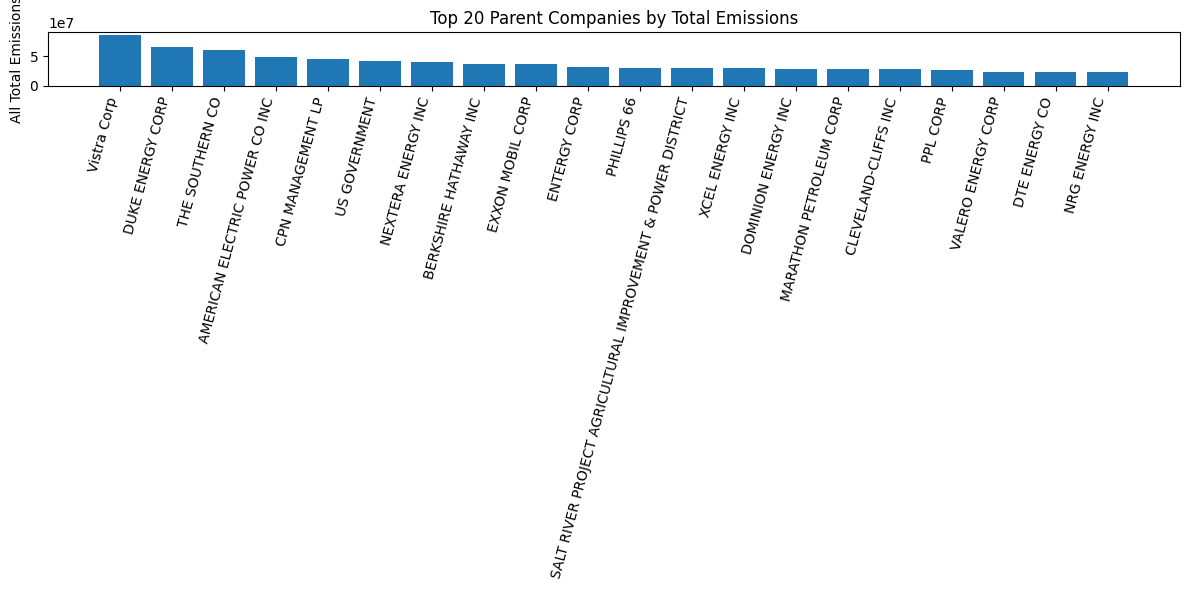

In [29]:
import matplotlib.pyplot as plt

# Sort and extract top 20
top_20 = company_totals.sort_values(
    "All Total Emissions", ascending=False
).head(20)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_20["Parent Company Name"], top_20["All Total Emissions"])
plt.xticks(rotation=75, ha="right")
plt.ylabel("All Total Emissions")
plt.title("Top 20 Parent Companies by Total Emissions")
plt.tight_layout()
plt.show()


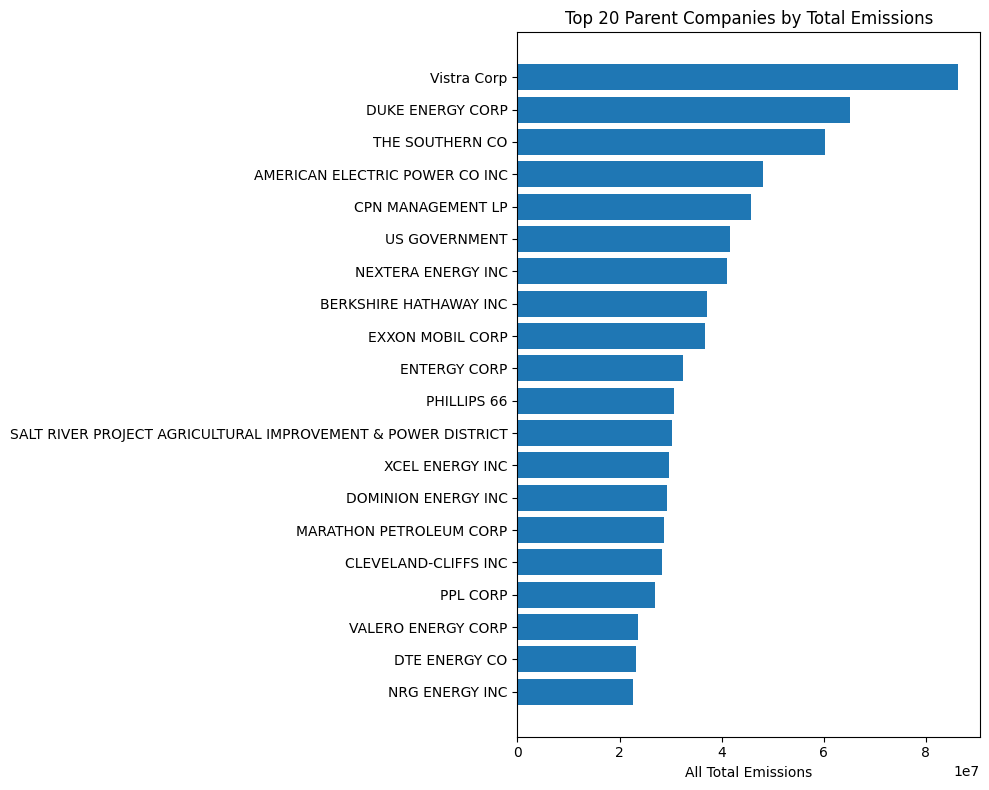

In [30]:
plt.figure(figsize=(10, 8))
plt.barh(top_20["Parent Company Name"], top_20["All Total Emissions"])
plt.gca().invert_yaxis()
plt.xlabel("All Total Emissions")
plt.title("Top 20 Parent Companies by Total Emissions")
plt.tight_layout()
plt.show()


In [33]:
esg = pd.read_csv("esg.csv")
esg.head()

,ticker,name,currency,exchange,industry,logo,weburl,environment_grade,environment_level,social_grade,...,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,last_processing_date,total_grade,total_level,cik
0,dis,Walt Disney Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/ef50b4a2b263c84...,https://thewaltdisneycompany.com/,A,High,BB,...,BB,Medium,510,316,321,1147,19-04-2022,BBB,High,1744489
1,gm,General Motors Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Automobiles,https://static.finnhub.io/logo/9253db78-80c9-1...,https://www.gm.com/,A,High,BB,...,B,Medium,510,303,255,1068,17-04-2022,BBB,High,1467858
2,gww,WW Grainger Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Trading Companies and Distributors,https://static.finnhub.io/logo/f153dcda-80eb-1...,https://www.grainger.com/,B,Medium,BB,...,B,Medium,255,385,240,880,19-04-2022,BB,Medium,277135
3,mhk,Mohawk Industries Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Consumer products,https://static.finnhub.io/logo/26868a62-80ec-1...,https://mohawkind.com/,A,High,B,...,BB,Medium,570,298,303,1171,18-04-2022,BBB,High,851968
4,lyv,Live Nation Entertainment Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/1cd144d2-80ec-1...,https://www.livenationentertainment.com/,BBB,High,BB,...,B,Medium,492,310,250,1052,18-04-2022,BBB,High,1335258
